Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
     


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Preparing the Image data

In [45]:

import os

dataset_path = '/content/drive/My Drive/New folder'

folders = os.listdir(dataset_path)
print(folders)

['no', 'yes']


In [46]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

no contains 98 images
yes contains 165 images


In [47]:
def load_images(folder):
    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels


In [48]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((263, 128, 128), (263,))

Visualizing images

In [49]:
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

10 images with brain tumor

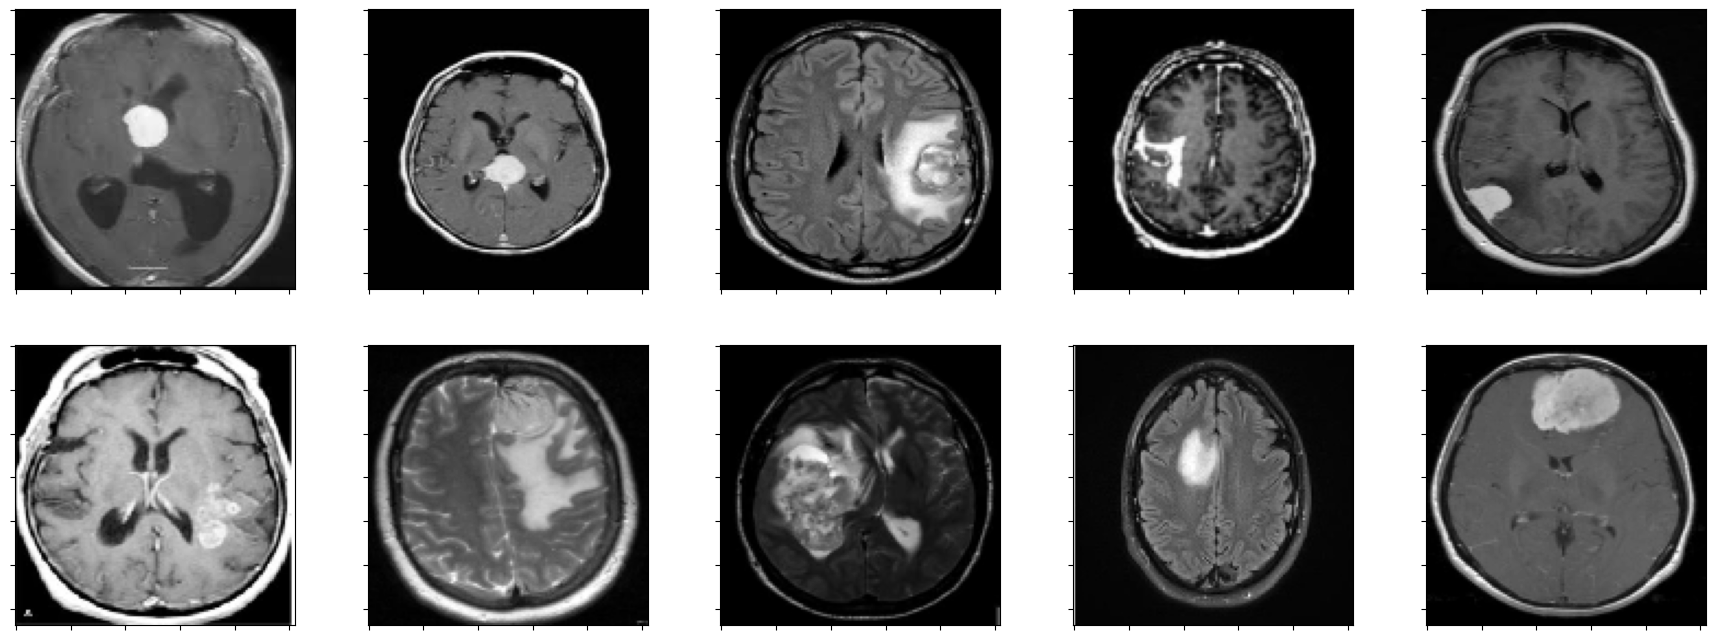

In [50]:
plot_images(98,262)
     

10 images without brain tumor

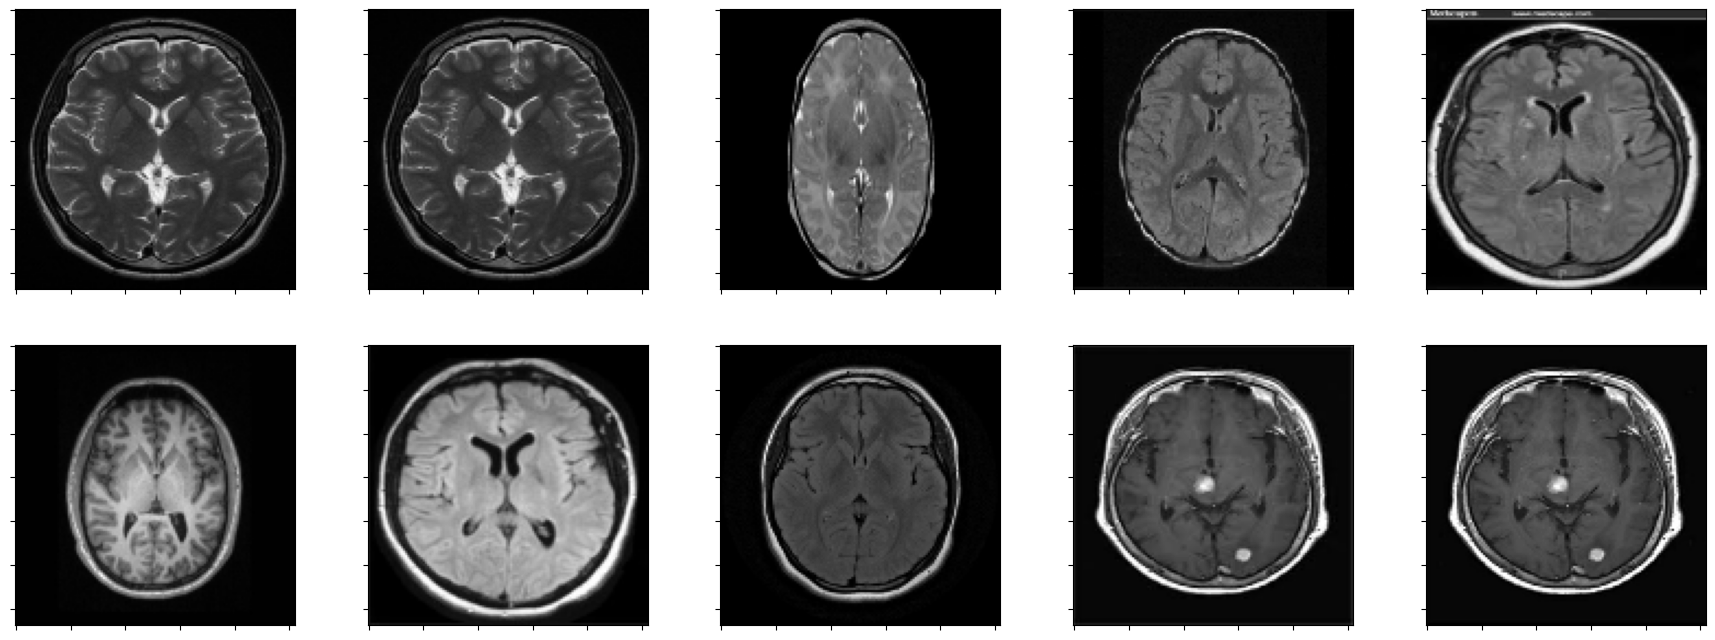

In [52]:
plot_images(0,97)

Normalization

In [53]:
norm_data = data / 255. 
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((263, 128, 128, 1),
 array([[[0.24705882],
         [0.14901961],
         [0.15294118],
         ...,
         [0.14117647],
         [0.12941176],
         [0.22745098]],
 
        [[0.12941176],
         [0.02745098],
         [0.03529412],
         ...,
         [0.02745098],
         [0.02352941],
         [0.11764706]],
 
        [[0.1254902 ],
         [0.02352941],
         [0.03529412],
         ...,
         [0.03529412],
         [0.04313725],
         [0.14117647]],
 
        ...,
 
        [[0.10588235],
         [0.01960784],
         [0.03921569],
         ...,
         [0.01960784],
         [0.01568627],
         [0.10588235]],
 
        [[0.10980392],
         [0.02352941],
         [0.03921569],
         ...,
         [0.03529412],
         [0.03529412],
         [0.12156863]],
 
        [[0.18823529],
         [0.10196078],
         [0.11764706],
         ...,
         [0.11372549],
         [0.11372549],
         [0.19607843]]]))

Convolutional Neural Network

In [54]:
SEED = 40
     

tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
  

compiling the model

In [55]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

fitting the model

In [56]:
history = model.fit(norm_data, labels, epochs = 10, validation_split = 0.20)

Epoch 1/10
7/7 [==============================] - 25s 3s/step - loss: 0.6886 - accuracy: 0.5619 - val_loss: 0.6175 - val_accuracy: 0.8491
Epoch 2/10
7/7 [==============================] - 24s 3s/step - loss: 0.5928 - accuracy: 0.7524 - val_loss: 0.3746 - val_accuracy: 0.8302
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 0.5588 - accuracy: 0.7476 - val_loss: 0.4017 - val_accuracy: 0.8302
Epoch 4/10
7/7 [==============================] - 23s 3s/step - loss: 0.4875 - accuracy: 0.7714 - val_loss: 0.5405 - val_accuracy: 0.7736
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.4648 - accuracy: 0.7857 - val_loss: 0.4706 - val_accuracy: 0.8113
Epoch 6/10
7/7 [==============================] - 23s 3s/step - loss: 0.4312 - accuracy: 0.8143 - val_loss: 0.5152 - val_accuracy: 0.8113
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 0.4069 - accuracy: 0.8238 - val_loss: 0.4030 - val_accuracy: 0.8679
Epoch 8/10
7/7 [==================

Evaluation

In [57]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 91.63%
Loss: 0.2271


this above result gives the evaluation on the training set only, now we will make predictions on randomly picked images from the training data and compare our results.

randomly generating 20 numbers to index from data

In [58]:
np.random.seed(SEED)
indxs = np.random.randint(0, 262, 20)
     

y_pred_prob = model.predict(norm_data[indxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[indxs]
y_pred.shape, y_true.shape
     

1/1 [==============================] - 0s 444ms/step


((20,), (20,))

In [59]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

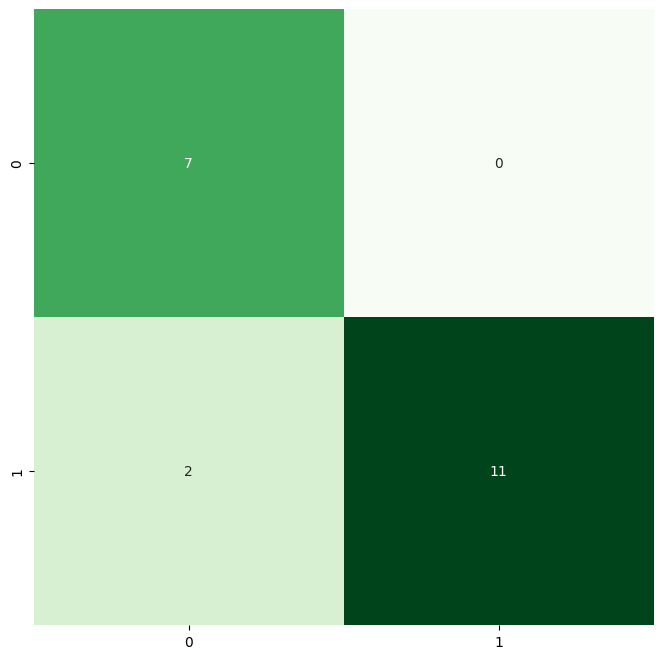

In [60]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()
     

In [61]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.85      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                  

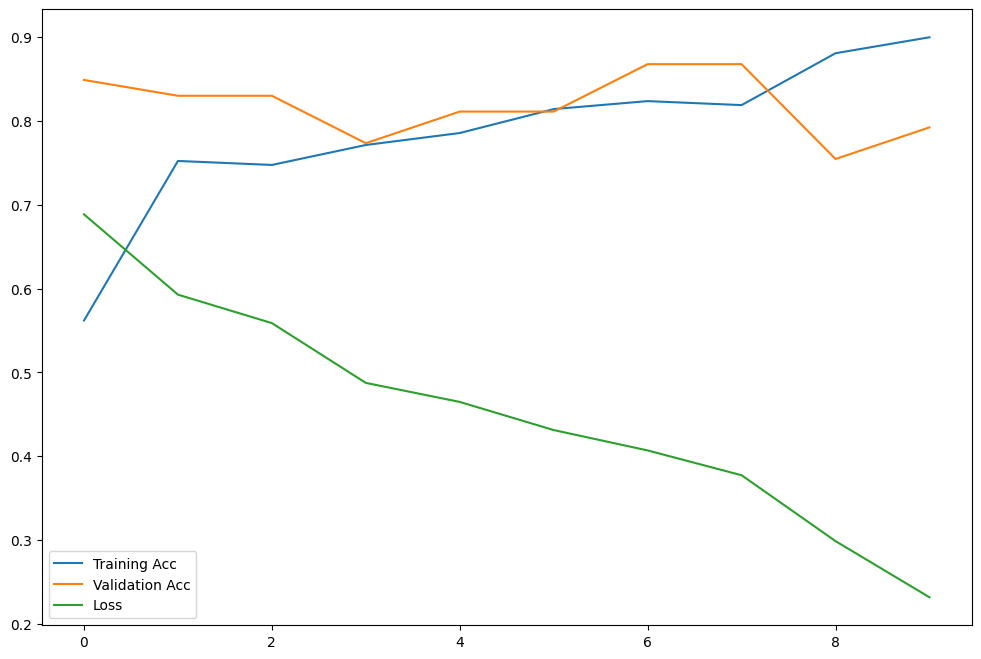

In [63]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()